In [1]:
#Fashion sales forecasting
#Author:Saranya veni
#Description:Time series forecasting using python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

C:\Users\91989\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
import pandas as pd
df=pd.read_csv("sales_data.csv")
df.head()

,month,season,baby_age_group,dress_type,fabric,color_family,monthly_sales_units
0,31-01-2023,Winter,0-3 months,Onesie,Organic Cotton,Pastel,420
1,28-02-2023,Winter,0-3 months,Romper,Cotton,Pastel,380
2,31-03-2023,Summer,3-6 months,Sleepsuit,Cotton,Neutral,450
3,30-04-2023,Summer,3-6 months,Onesie,Organic Cotton,Pastel,500
4,31-05-2023,Summer,0-3 months,Romper,Bamboo,Neutral,470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                24 non-null     object
 1   season               24 non-null     object
 2   baby_age_group       24 non-null     object
 3   dress_type           24 non-null     object
 4   fabric               24 non-null     object
 5   color_family         24 non-null     object
 6   monthly_sales_units  24 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 1.4+ KB


In [5]:
df_forecast = df.copy()
df_forecast['ds']=pd.to_datetime(df_forecast['month'])
df_forecast['y'] = df_forecast['monthly_sales_units']
df_forecast = df_forecast[['ds','y']]
df_forecast.head()

C:\Users\91989\AppData\Local\Temp\ipykernel_18740\1152343952.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_forecast['ds']=pd.to_datetime(df_forecast['month'])


,ds,y
0,2023-01-31,420
1,2023-02-28,380
2,2023-03-31,450
3,2023-04-30,500
4,2023-05-31,470


In [6]:
#Training Prophet model
model = Prophet()
model.fit(df_forecast)

13:41:04 - cmdstanpy - INFO - Chain [1] start processing
13:41:04 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
#Future Prediction(next 6 months)
future = model.make_future_dataframe(periods=6,freq='M')
future.tail()

C:\Users\91989\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
25,2025-02-28
26,2025-03-31
27,2025-04-30
28,2025-05-31
29,2025-06-30


In [8]:
forecast=model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
25,2025-02-28,558.868930,509.626173,613.558790
26,2025-03-31,563.476140,508.995690,617.632621
27,2025-04-30,567.934730,515.959773,625.127041
28,2025-05-31,572.541939,521.890813,630.614768
29,2025-06-30,577.000529,521.286172,629.835088


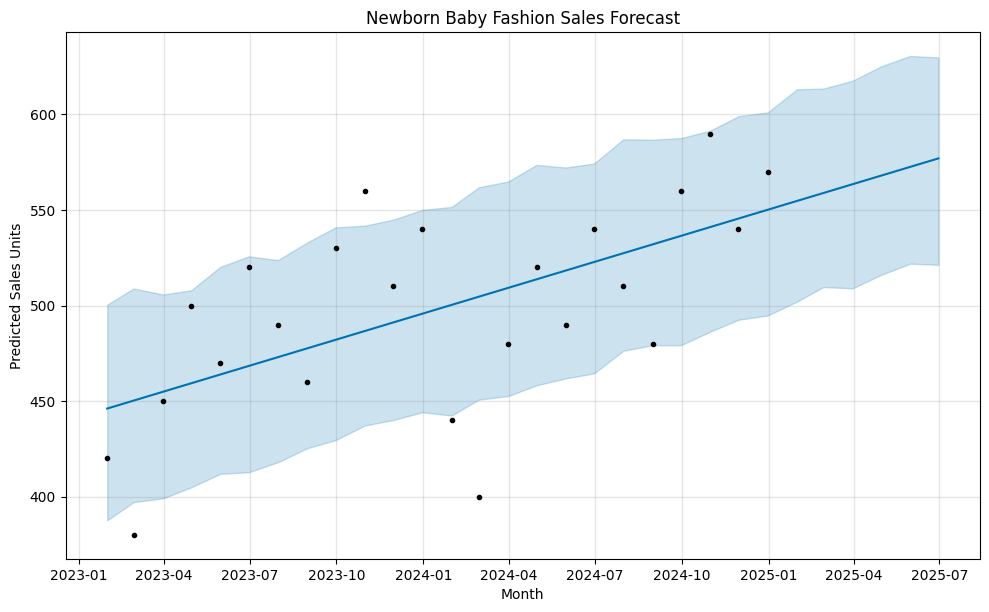

In [9]:
model.plot(forecast)
plt.title("Newborn Baby Fashion Sales Forecast")
plt.xlabel("Month")
plt.ylabel("Predicted Sales Units")
plt.savefig("forecast.png",bbox_inches="tight")
plt.show()

In [10]:
#Dress typewise total sales
df.groupby('dress_type')['monthly_sales_units'].sum().sort_values(ascending=False)

dress_type
Onesie       5140
Romper       3830
Sleepsuit    2980
Name: monthly_sales_units, dtype: int64

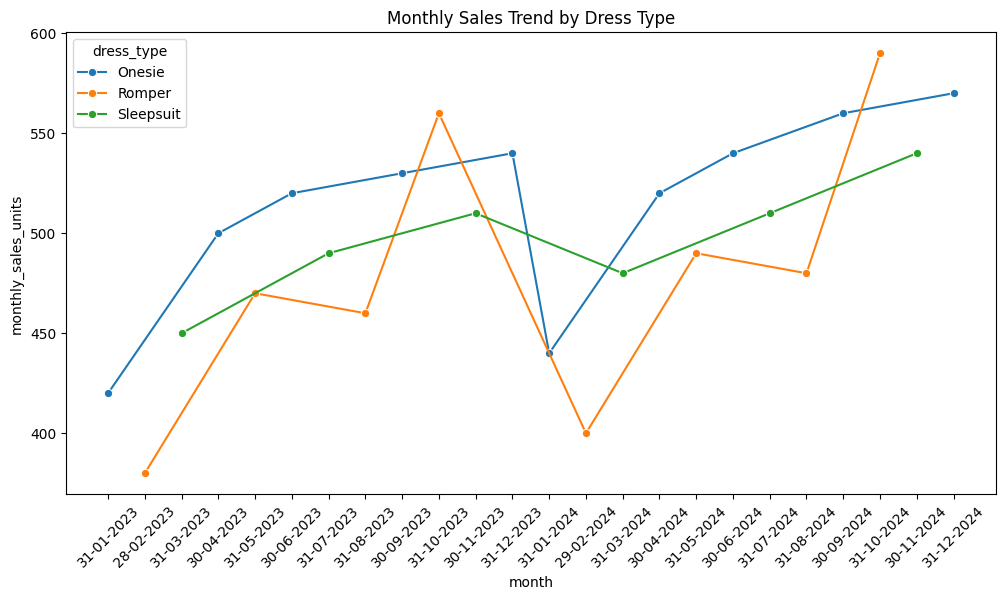

In [11]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='month',y='monthly_sales_units',hue='dress_type',marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend by Dress Type")
plt.show()

In [12]:
dress_types = df['dress_type'].unique()
forecast_dict={}
for dress in dress_types:
    df_temp = df[df['dress_type']==dress].copy()
    df_temp['ds'] = pd.to_datetime(df_temp['month'],dayfirst=True)
    df_temp['y']=df_temp['monthly_sales_units']
    df_temp = df_temp[['ds','y']]
    model = Prophet()
    model.fit(df_temp)
    future = model.make_future_dataframe(periods=6,freq='ME')
    forecast = model.predict(future)
    forecast_dict[dress]=forecast[['ds','yhat','yhat_lower','yhat_upper']]

13:41:06 - cmdstanpy - INFO - Chain [1] start processing
13:41:06 - cmdstanpy - INFO - Chain [1] done processing
13:41:06 - cmdstanpy - INFO - Chain [1] start processing
13:41:07 - cmdstanpy - INFO - Chain [1] done processing
13:41:07 - cmdstanpy - INFO - Chain [1] start processing
13:41:07 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
#FUTURE FORECAST RESULT

In [14]:
summary = []
for dress,forecast in forecast_dict.items():
    future_only = forecast.tail(6) #next 6 months
    avg_sales = future_only['yhat'].mean()
    summary.append({
        'dress_type':dress,
        'avg_future_sales':round(avg_sales,2)
    })

summary_df = pd.DataFrame(summary)
summary_df

,dress_type,avg_future_sales
0,Onesie,581.21
1,Romper,549.80
2,Sleepsuit,542.86


In [15]:
#HIGH vs LOW SELLING DRESS IDENTIFY 

In [16]:
summary_df=summary_df.sort_values(by='avg_future_sales',ascending=False)
summary_df

,dress_type,avg_future_sales
0,Onesie,581.21
1,Romper,549.80
2,Sleepsuit,542.86


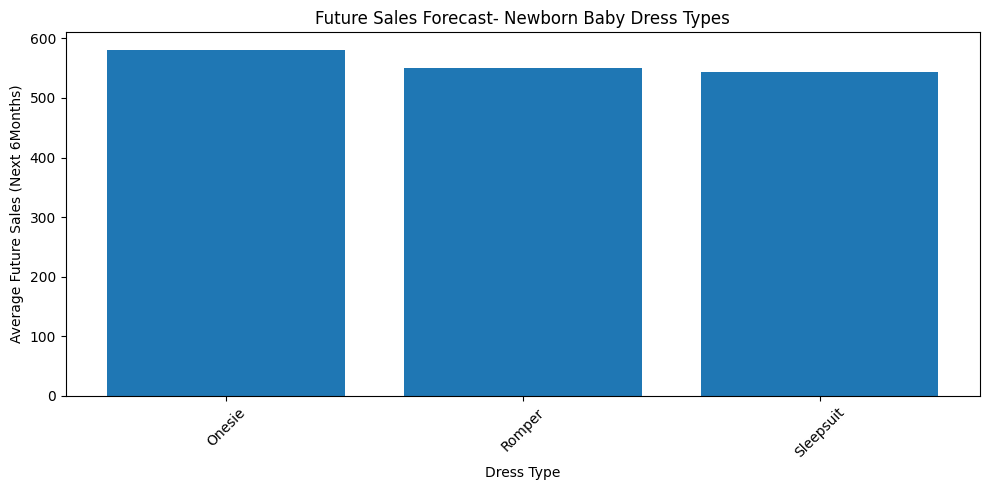

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(summary_df['dress_type'],summary_df['avg_future_sales'])
plt.xlabel("Dress Type")
plt.ylabel("Average Future Sales (Next 6Months)")
plt.title("Future Sales Forecast- Newborn Baby Dress Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#top_3 High selling newborn dresses

In [19]:
top_3_dresses = summary_df.head(3)
top_3_dresses

,dress_type,avg_future_sales
0,Onesie,581.21
1,Romper,549.80
2,Sleepsuit,542.86


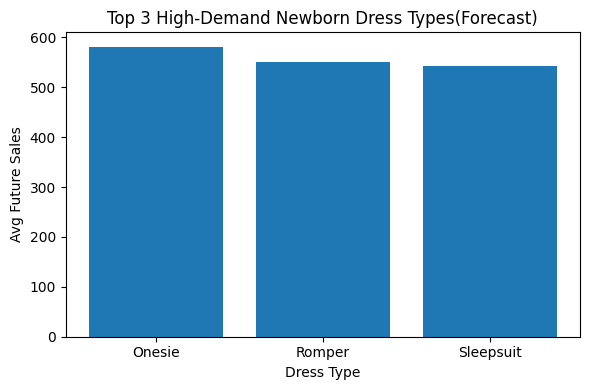

In [20]:
plt.figure(figsize=(6,4))
plt.bar(top_3_dresses['dress_type'],top_3_dresses['avg_future_sales'])
plt.title("Top 3 High-Demand Newborn Dress Types(Forecast)")
plt.xlabel("Dress Type")
plt.ylabel("Avg Future Sales")
plt.tight_layout()
plt.show()

In [21]:
#combining forecast data
all_forecasts = []

for dress, fc in forecast_dict.items():
    temp = fc.copy()
    temp['dress_type'] = dress
    all_forecasts.append(temp)

season_df = pd.concat(all_forecasts)
season_df.head()

,ds,yhat,yhat_lower,yhat_upper,dress_type
0,2023-01-31,463.403696,420.493652,505.055109,Onesie
1,2023-04-30,476.423337,430.906354,520.340836,Onesie
2,2023-06-30,485.346912,439.435674,527.279334,Onesie
3,2023-09-30,498.805418,454.168210,540.853976,Onesie
4,2023-12-31,512.263924,469.588359,554.430255,Onesie


In [22]:
#extracting month
season_df['month'] = season_df['ds'].dt.month
season_df['month_name'] = season_df['ds'].dt.strftime('%B')

In [23]:
seasonal_summary = (
    season_df
    .groupby(['dress_type', 'month_name'])['yhat']
    .mean()
    .reset_index()
)

seasonal_summary.head()

,dress_type,month_name,yhat
0,Onesie,April,529.916022
1,Onesie,December,539.034647
2,Onesie,February,574.436369
3,Onesie,January,516.847617
4,Onesie,June,538.839596


In [24]:
peak_season = (
    seasonal_summary
    .sort_values('yhat', ascending=False)
    .groupby('dress_type')
    .head(1)
)

peak_season

,dress_type,month_name,yhat
6,Onesie,May,587.894874
8,Romper,April,563.137604
23,Sleepsuit,May,551.375650


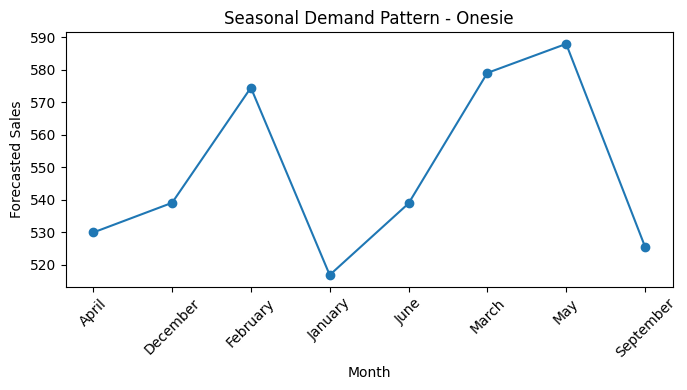

In [25]:
example_dress = seasonal_summary['dress_type'].unique()[0]

temp = seasonal_summary[seasonal_summary['dress_type'] == example_dress]

plt.figure(figsize=(7,4))
plt.plot(temp['month_name'], temp['yhat'], marker='o')
plt.title(f"Seasonal Demand Pattern - {example_dress}")
plt.xlabel("Month")
plt.ylabel("Forecasted Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()